<center><h1 style="color: #555555;">Experience Script Documentation</h1></center>

<div align="center">
    <table style="width: 80%; border-collapse: collapse;">
        <tr>
            <th style="background-color: #6AAFE6; color: #ffffff; padding: 10px;">Context</th>
            <th style="background-color: #6AAFE6; color: #ffffff; padding: 10px;">Approach</th>
            <th style="background-color: #6AAFE6; color: #ffffff; padding: 10px;">Value Created</th>
        </tr>
        <tr>
            <td style="background-color: #E8F4FC; padding: 10px;">Supplier server-side geneartion of different teams and software modules, to enrich the spendign data. </td>
            <td style="background-color: #E8F4FC; padding: 10px;">Used data indexing and set operations to overlap unique elements.</td>
            <td style="background-color: #E8F4FC; padding: 10px;"> Workflow design for iterative report quality assesment, securing data integrity and offering a scalable resource.</td>
        </tr>
    </table>
</div>
</html>

## step 1 - Data Import & clean

### CONTRACTS SUPPLIER MASTER

In [ ]:
import pandas as pd

# Define data types for the columns
contracts_dtype = {
    'Supplier Name': 'str',
    'ERP Supplier Number': 'str'
}
# Load data from Excel
contracts = pd.read_excel(
    'D:\\Users\\diana.fernandez\\Downloads\\HPOne Supplier List 6.27.24.xlsx',
    sheet_name='With ERP Supplier ID',
    dtype=contracts_dtype
)
# Print actual column names to ensure they are correct
print("Actual column names:", contracts.columns.tolist())

# Rename columns
contracts.rename(columns={
    'Supplier Name': 'Supplier',
    'ERP Supplier Number': 'Supplier ID'
}, inplace=True)

# Print actual column names to ensure they are correct
print("Renamed column names:", contracts.columns.tolist())

# Proceed with further data cleaning
contracts['Supplier ID'] = contracts['Supplier ID'].fillna('missing').str.strip()
contracts['Supplier'] = contracts['Supplier'].fillna('missing').str.strip()

contracts['ASSETID'] = contracts['Supplier ID'].astype(str) + contracts['Supplier'].astype(str)
contracts.set_index('ASSETID', inplace=True)

# Print DataFrame info
print(f"Master file initial shape: {contracts.shape}")

# Print distinct value counts
print(f"Distinct Supplier ID count: {contracts['Supplier ID'].nunique()}")
print(f"Distinct Supplier name count: {contracts['Supplier'].nunique()}")
print(f"Distinct ASSETID count: {contracts.index.nunique()}") 

Actual column names: ['Supplier Name', 'ERP Supplier Number']
Renamed column names: ['Supplier', 'Supplier ID']
Master file initial shape: (269, 2)
Distinct Supplier ID count: 157
Distinct Supplier name count: 269
Distinct ASSETID count: 269


### SUPPLIER MASTER

In [ ]:
import pandas as pd

dtype = {
    'ASSETID':'str',
    'Supplier ID': 'str',
    'Supplier': 'str',
    'Supplier Category': 'str',
    'Supplier Group': 'str',
    'Primary Remit-To Address': 'str',
    'Supplier Address 1': 'str',
    'Supplier City': 'str',
    'Supplier State': 'str',
    'Supplier Zip Postal Code': 'str',
    'Supplier Country': 'str',
    'Default Payment Terms': 'str',
    'Default Currency': 'str',
    'Tax ID': 'str',
    'Added Date': 'str'
}

# Read the supplier master
supplier_master = pd.read_csv('HPO Supplier Master 7.3.24c.csv', encoding='UTF-8-SIG', dtype=dtype)

# Assign the index
supplier_master.set_index('ASSETID', inplace=True)

# Print DataFrame info
print(f"Masater file initial shape: {supplier_master.shape}")
print (f"Distinct Supplier ID count: {supplier_master['Supplier ID'].nunique()}")
print(f"Distinct Supplier name count: {supplier_master['Supplier'].nunique()}")
print(f"Distinct ASSETID count: {supplier_master.index.nunique()}") 

Masater file initial shape: (813, 14)
Distinct Supplier ID count: 813
Distinct Supplier name count: 813
Distinct ASSETID count: 813


## step 2 - visualize the expected result

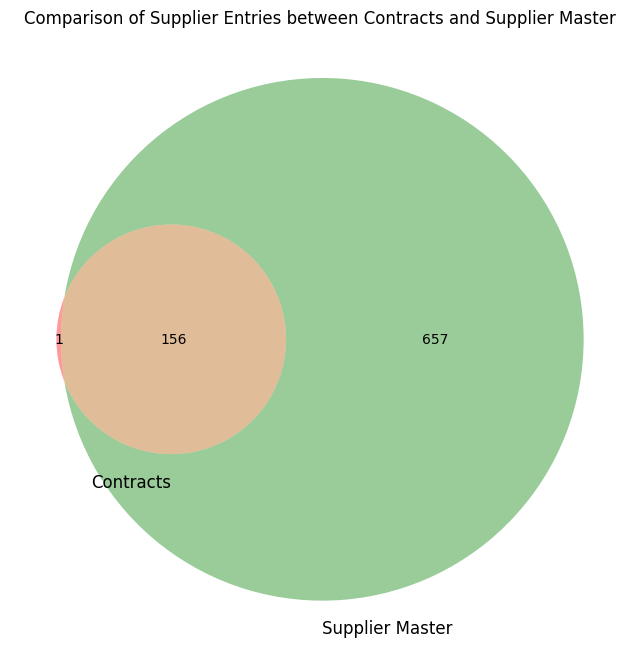

Total suppliers in contracts: 157
Total suppliers in master file: 813
Intersection count: 156


In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Prepare sets for Venn diagram
suppliers_in_contracts = set(contracts.index)
suppliers_in_master = set(supplier_master.index)

# Calculate the intersection
intersection_count = len(suppliers_in_contracts & suppliers_in_master)

# Create Venn diagram
plt.figure(figsize=(8, 8))
venn_diagram = venn2([suppliers_in_contracts, suppliers_in_master], set_labels=('Contracts', 'Supplier Master'))
plt.title("Comparison of Supplier Entries between Contracts and Supplier Master")
plt.show()

# Output counts
print("Total suppliers in contracts:", len(suppliers_in_contracts))
print("Total suppliers in master file:", len(suppliers_in_master))
print("Intersection count:", intersection_count)




## step 3 - Enrich the supplier data 

In [ ]:

# Merge the DataFrames on the index, adding appropriate suffixes
merged_df = supplier_master.merge(contracts, left_index=True, right_index=True, how='left', suffixes=('', '_contract'))

# Create 'SPEND_UNDER_CONTRACT' column based on the existence of matches
supplier_master['SPEND_UNDER_CONTRACT'] = merged_df['Supplier_contract'].apply(lambda x: 'YES' if pd.notna(x) else 'NO')

# Display the value counts for the 'SPEND_UNDER_CONTRACT' column
print("Value Counts for 'SPEND_UNDER_CONTRACT':")
print(supplier_master['SPEND_UNDER_CONTRACT'].value_counts())


Value Counts for 'SPEND_UNDER_CONTRACT':
SPEND_UNDER_CONTRACT
NO     700
YES    113
Name: count, dtype: int64


In [ ]:
# Export the final report
supplier_master.to_csv('HPO Supplier Master 7.3.24d-spend under contract.csv', encoding='UTF-8-SIG')